In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x1 = np.linspace(-7, 7, 100)
x2 = np.linspace(-7, 7, 100)

f = lambda x: 10 * x[0] ** 2 + x[1] ** 2
df_dx = lambda x: np.array([20 * x[0], 2 * x[1]])

In [3]:
eps = 1
alpha = 0.5
beta = 0.8
iter_num = 10
n = 0
x_init = np.array([1, 5]) # for the example shown in class
# x_init = np.random.normal(-4, 4, [2])
x_ = x_init
searched_point = [x_init]
while n < iter_num:
    grad = df_dx(x_)
    eps = 1
    x_next = x_ - eps * grad
    while f(x_next) - f(x_) > - alpha * eps * (np.linalg.norm(grad, ord=2) ** 2):
        eps = eps * beta
        x_next = x_ - eps * grad
    searched_point.append(list(x_))
    x_ = x_next
    n = n + 1

In [4]:
searched_point = np.array(searched_point).T

In [5]:
xx, yy = np.meshgrid(x1, x2)
z = f(np.array([xx, yy]))

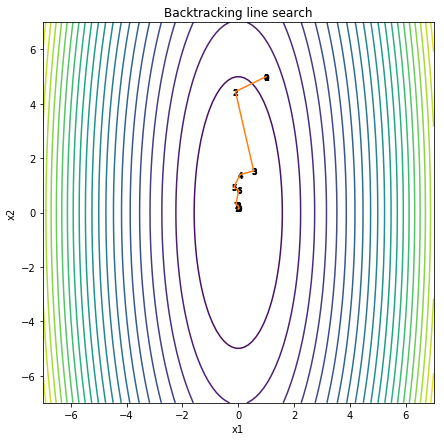

In [6]:
plt.figure(figsize=(7, 7))
plt.contour(xx, yy, z, levels=25)
plt.plot(x_init[0], x_init[1], marker="$0$")
# plt.plot(x_[0],x_[1],  marker='$1$')
for i in range(searched_point.shape[1]):
    plt.plot(searched_point[0][i], searched_point[1][i], marker="$" + str(i) + "$", color="black")
plt.plot(searched_point[0], searched_point[1])
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.title("Backtracking line search")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()